## 1)  Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Import data

Import the sas table to a pandas dataframe 

In [5]:
dataset = pd.read_sas('../data/a2z_insurance.sas7bdat')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
dataset.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [8]:
dataset.shape

(10296, 14)

## 2) Preprocessing

<b> Check if we have missing data </b>

In [9]:
dataset.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In the data we can find that we have in total 309 rows with missing data. 
First I will impute the ones with the premiums to 0, so what I'm saying is that if they the premiums are missing is because the client does not have any policy from that LoB. 
The rest I will impute with the median or with the mode

In [10]:
## imputing product premiums with 0 -> no premiums

dataset['PremMotor'].fillna(0, inplace=True)
dataset['PremHealth'].fillna(0, inplace=True)
dataset['PremLife'].fillna(0, inplace=True)
dataset['PremWork'].fillna(0, inplace=True)

## impute continuos variavels with the median

dataset['MonthSal'].fillna(dataset['MonthSal'].median(),inplace=True)

## impute discrete and categorical varibles with the mode

dataset['FirstPolYear'].fillna(dataset['FirstPolYear'].mode()[0],inplace=True)
dataset['BirthYear'].fillna(dataset['BirthYear'].mode()[0],inplace=True)
dataset['EducDeg'].fillna(dataset['EducDeg'].mode()[0],inplace=True)
dataset['GeoLivArea'].fillna(dataset['GeoLivArea'].mode()[0],inplace=True)
dataset['Children'].fillna(dataset['Children'].mode()[0],inplace=True)

In [11]:
dataset.isna().sum()

CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [15]:
## put CustID as index of the dataframe
dataset.set_index('CustID', inplace = True)

In [16]:
print(dataset.shape)

(10296, 13)


In [17]:
dataset.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


<b> Encoding the categorical variables </b>

In [22]:
## encoding level of education

le = LabelEncoder()
dataset['EducationLevel'] = le.fit_transform(dataset.EducDeg)

In [33]:
pd.crosstab(dataset.EducationLevel,dataset.EducDeg)

EducDeg,b'1 - Basic',b'2 - High School',b'3 - BSc/MSc',b'4 - PhD'
EducationLevel,,,,
0,1272,0,0,0
1,0,3510,0,0
2,0,0,4816,0
3,0,0,0,698


Because I dont know anything about the Geo living area I will use dummy variables instead of ordinal 

In [35]:
## geographic area
## how many there are?

dataset['GeoLivArea'].value_counts().sort_index()

1.0    3048
2.0    1036
3.0    2066
4.0    4146
Name: GeoLivArea, dtype: int64

In [36]:
# changing the type to int to be a more likely name
dataset['GeoLivArea'] = dataset['GeoLivArea'].astype(int)

# create dummies
living_dummies = pd.get_dummies(dataset['GeoLivArea'], prefix = 'GeoLiv')

In [37]:
living_dummies

,GeoLiv_1,GeoLiv_2,GeoLiv_3,GeoLiv_4
CustID,,,,
1.0,1,0,0,0
2.0,0,0,0,1
3.0,0,0,1,0
4.0,0,0,0,1
5.0,0,0,0,1
...,...,...,...,...
10292.0,0,1,0,0
10293.0,0,0,1,0
10294.0,1,0,0,0


In [38]:
## concatenate these dummies to the dataset

dataset = pd.concat([dataset,living_dummies], axis=1)

In [88]:
# drop initial columns
dataset_preprocess = dataset.drop(columns=['EducDeg','GeoLivArea'])

In [89]:
dataset_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FirstPolYear    10296 non-null  float64
 1   BirthYear       10296 non-null  float64
 2   MonthSal        10296 non-null  float64
 3   Children        10296 non-null  float64
 4   CustMonVal      10296 non-null  float64
 5   ClaimsRate      10296 non-null  float64
 6   PremMotor       10296 non-null  float64
 7   PremHousehold   10296 non-null  float64
 8   PremHealth      10296 non-null  float64
 9   PremLife        10296 non-null  float64
 10  PremWork        10296 non-null  float64
 11  EducationLevel  10296 non-null  int32  
 12  GeoLiv_1        10296 non-null  uint8  
 13  GeoLiv_2        10296 non-null  uint8  
 14  GeoLiv_3        10296 non-null  uint8  
 15  GeoLiv_4        10296 non-null  uint8  
dtypes: float64(11), int32(1), uint8(4)
memory usage: 1.0 MB


In [90]:
## create new variables for client and policy tenure

## client tenure
dataset_preprocess['ClientTenure'] = 2016-dataset_preprocess['FirstPolYear']

## policy tenure
dataset_preprocess['ClientAge'] = 2016-dataset_preprocess['BirthYear'] 

## age that client bougth is first policy

dataset_preprocess['AgeBuy'] = dataset_preprocess['ClientAge'] - dataset_preprocess['ClientTenure']

## client has specific LoB
dataset_preprocess['HasMotor'] = np.where(dataset_preprocess['PremMotor']>0,1,0)
dataset_preprocess['HasHome'] = np.where(dataset_preprocess['PremHousehold']>0,1,0)
dataset_preprocess['HasHealth'] = np.where(dataset_preprocess['PremHealth']>0,1,0)
dataset_preprocess['HasLife'] = np.where(dataset_preprocess['PremLife']>0,1,0)
dataset_preprocess['HasWork'] = np.where(dataset_preprocess['PremWork']>0,1,0)

## total number of LoB
dataset_preprocess['NumberProducts'] = dataset_preprocess['HasMotor']+dataset_preprocess['HasHome']+dataset_preprocess['HasHealth']+dataset_preprocess['HasLife']+dataset_preprocess['HasWork']

## is the client multi-product

dataset_preprocess['IsEquiped'] = np.where(dataset_preprocess['NumberProducts']>1,1,0)

## remove the negative values from the premium variables
## We know that clients with negative premiums is due to cancelations but because I cannot guarantee that all clients who cancelled
## have reversals

## But first I will mark them

dataset_preprocess['MotorReturns'] = np.where(dataset_preprocess['PremMotor']<0,1,0)
dataset_preprocess['HouseReturns'] = np.where(dataset_preprocess['PremHousehold']<0,1,0)
dataset_preprocess['HealthReturns'] = np.where(dataset_preprocess['PremHealth']<0,1,0)
dataset_preprocess['LifeReturns'] = np.where(dataset_preprocess['PremLife']<0,1,0)
dataset_preprocess['WorkReturns'] = np.where(dataset_preprocess['PremWork']<0,1,0)

dataset_preprocess['TotalReturns'] = dataset_preprocess['MotorReturns']+dataset_preprocess['HouseReturns']+dataset_preprocess['HealthReturns']+dataset_preprocess['LifeReturns']+dataset_preprocess['WorkReturns'] 

dataset_preprocess['HasReturns'] = np.where(dataset_preprocess['TotalReturns']>0,1,0)

## if the premium is negative than equals 0

dataset_preprocess['PremMotor'] = np.where(dataset_preprocess['PremMotor']>=0,dataset_preprocess['PremMotor'],0)
dataset_preprocess['PremHousehold'] = np.where(dataset_preprocess['PremHousehold']>=0,dataset_preprocess['PremHousehold'],0)
dataset_preprocess['PremHealth'] = np.where(dataset_preprocess['PremHealth']>=0,dataset_preprocess['PremHealth'],0)
dataset_preprocess['PremLife'] = np.where(dataset_preprocess['PremLife']>=0,dataset_preprocess['PremLife'],0)
dataset_preprocess['PremWork'] = np.where(dataset_preprocess['PremWork']>=0,dataset_preprocess['PremWork'],0)

## Clients total premiums

dataset_preprocess['TotalPremiums'] = dataset_preprocess['PremMotor']+dataset_preprocess['PremHousehold']+dataset_preprocess['PremHealth']+dataset_preprocess['PremLife']+dataset_preprocess['PremWork']

## average client premium by LoB

dataset_preprocess['AveragePremium'] = dataset_preprocess['TotalPremiums']/dataset_preprocess['NumberProducts']

## proportions of premiums

dataset_preprocess['PremMotorProp'] = dataset_preprocess['PremMotor']/dataset_preprocess['TotalPremiums']
dataset_preprocess['PremHouseholdProp'] = dataset_preprocess['PremHousehold']/dataset_preprocess['TotalPremiums']
dataset_preprocess['PremHealthProp'] = dataset_preprocess['PremHealth']/dataset_preprocess['TotalPremiums']
dataset_preprocess['PremLifeProp'] = dataset_preprocess['PremLife']/dataset_preprocess['TotalPremiums']
dataset_preprocess['PremWorkProp'] = dataset_preprocess['PremWork']/dataset_preprocess['TotalPremiums']

## client margin in th

# how much premium was not spent in claims
dataset_preprocess['ClientPercMargin'] = 1-dataset_preprocess['ClaimsRate']
dataset_preprocess['ClientMargin'] = dataset_preprocess['ClientPercMargin']*dataset_preprocess['TotalPremiums']

## proportion of client salary spend in insurance

#first what is the yearly salary

dataset_preprocess['YearSal'] = dataset_preprocess['MonthSal']*12

dataset_preprocess['EffortYearRate'] = dataset_preprocess['YearSal']/dataset_preprocess['TotalPremiums']

In [91]:
dataset_preprocess.drop(columns=['FirstPolYear','BirthYear'], inplace = True)

## Data Visualization

In [93]:
# describe the dataset
dataset_preprocess.describe().T.to_excel('DataDescription.xlsx')

In [87]:
# clients with claims that represent 2 times their premiums in the last 24 months: these are really bad clients
dataset_preprocess.loc[dataset_preprocess['ClaimsRate']>2].T

CustID,52.0,113.0,136.0,172.0,656.0,676.0,708.0,759.0,794.0,918.0,952.0,983.0,1026.0,7963.0,9649.0
MonthSal,3234.000000,2354.000000,2176.000000,1086.000000,3279.000000,4435.000000,1634.000000,1117.000000,1370.000000,3355.000000,1586.000000,1771.000000,4566.000000,1868.000000,3574.000000
Children,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
CustMonVal,-14714.080000,-8719.040000,-10198.910000,-165680.420000,-64891.000000,-52382.760000,-28945.400000,-10107.370000,-7851.170000,-26130.450000,-2642.910000,-6115.850000,-2082.830000,-56.100000,-37327.080000
ClaimsRate,25.360000,15.650000,14.800000,256.200000,96.000000,63.000000,35.000000,12.600000,13.900000,32.300000,5.600000,9.870000,4.360000,4.330000,69.000000
PremMotor,557.440000,518.320000,297.610000,378.070000,410.300000,197.480000,175.700000,193.370000,127.580000,135.580000,501.650000,83.350000,370.070000,0.000000,319.060000
PremHousehold,20.000000,4.450000,162.800000,78.900000,117.250000,280.600000,319.500000,342.850000,48.350000,290.050000,0.000000,98.350000,14.450000,0.000000,0.000000
PremHealth,29.560000,55.900000,143.360000,166.810000,95.350000,276.940000,294.390000,276.940000,398.410000,221.820000,90.460000,336.840000,189.590000,0.000000,245.380000
PremLife,5.000000,3.890000,136.470000,6.890000,37.340000,51.120000,44.120000,8.780000,19.560000,86.460000,0.000000,74.680000,14.780000,12.890000,4.890000
PremWork,0.000000,10.890000,0.000000,18.450000,22.560000,38.340000,16.890000,47.230000,12.780000,100.130000,0.000000,93.460000,23.560000,12.000000,4.780000
EducationLevel,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000


In [ ]:
dataset_preprocess.loc[dataset_preprocess['TotalPremiums']==0, []]

<AxesSubplot:xlabel='ClaimsRate', ylabel='TotalPremiums'>

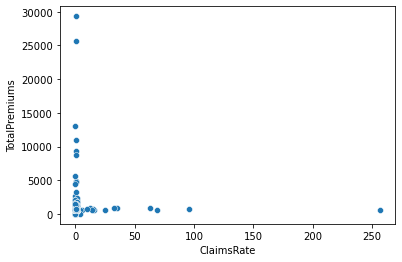

In [59]:
sns.scatterplot(x='ClaimsRate', y='TotalPremiums', data=dataset_preprocess)

In [44]:
## clients with FirstPolYear = 53784
dataset_preprocess.loc[dataset_preprocess['FirstPolYear']==53784]

,FirstPolYear,BirthYear,MonthSal,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,EducationLevel,GeoLiv_1,GeoLiv_2,GeoLiv_3,GeoLiv_4
CustID,,,,,,,,,,,,,,,,
9295.0,53784.0,1948.0,3268.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78,2,1,0,0,0


In [45]:
dataset_preprocess['FirstPolYear'].unique()

array([ 1985.,  1981.,  1991.,  1990.,  1986.,  1979.,  1988.,  1976.,
        1983.,  1977.,  1998.,  1974.,  1978.,  1995.,  1980.,  1984.,
        1989.,  1987.,  1982.,  1994.,  1993.,  1992.,  1997.,  1996.,
        1975., 53784.])

In [46]:
## replace outlier with mode
dataset_preprocess.FirstPolYear.replace(53784, dataset_preprocess['FirstPolYear'].mode()[0], inplace = True)

In [47]:
dataset_preprocess['FirstPolYear'].unique() # the outlier was removed

array([1985., 1981., 1991., 1990., 1986., 1979., 1988., 1976., 1983.,
       1977., 1998., 1974., 1978., 1995., 1980., 1984., 1989., 1987.,
       1982., 1994., 1993., 1992., 1997., 1996., 1975.])

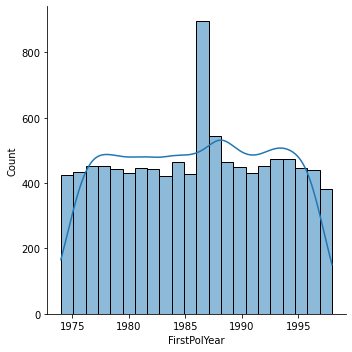

In [158]:
sns.displot(data= filtered_data, x='FirstPolYear', kde=True)

In [160]:
## clients with LTV equal to -160k

filtered_data.loc[filtered_data['CustMonVal']<-10000]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
51,1982.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00
135,1997.0,1988.0,b'3 - BSc/MSc',2176.0,4.0,1.0,-10198.91,14.80,297.61,162.80,143.36,136.47,-3.00
171,1990.0,1989.0,b'3 - BSc/MSc',1086.0,4.0,1.0,-165680.42,256.20,378.07,78.90,166.81,6.89,18.45
655,1974.0,1963.0,b'3 - BSc/MSc',3279.0,3.0,1.0,-64891.00,96.00,410.30,117.25,95.35,37.34,22.56
675,1994.0,1937.0,b'2 - High School',4435.0,1.0,0.0,-52382.76,63.00,197.48,280.60,276.94,51.12,38.34
707,1991.0,1991.0,b'3 - BSc/MSc',1634.0,1.0,1.0,-28945.40,35.00,175.70,319.50,294.39,44.12,16.89
758,1988.0,1992.0,b'3 - BSc/MSc',1117.0,1.0,1.0,-10107.37,12.60,193.37,342.85,276.94,8.78,47.23
917,1986.0,1952.0,b'2 - High School',3355.0,4.0,0.0,-26130.45,32.30,135.58,290.05,221.82,86.46,100.13
9648,1990.0,1950.0,b'3 - BSc/MSc',3574.0,3.0,0.0,-37327.08,69.00,319.06,-25.55,245.38,4.89,4.78


8 clients have a LTV < -10k are these outliers? it must be...

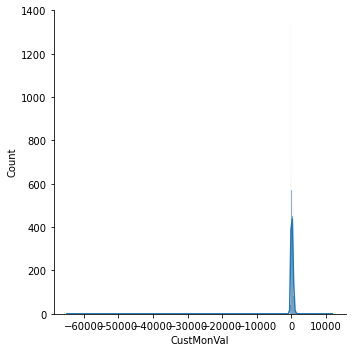

In [141]:
sns.displot(data= filtered_data, x='CustMonVal', kde=True)

In [161]:
filtered_data['CustMonValZscore'] = (filtered_data['CustMonVal'] - filtered_data['CustMonVal'].mean())/filtered_data['CustMonVal'].std(ddof=0)

<AxesSubplot:xlabel='CustMonVal', ylabel='CustMonValZscore'>

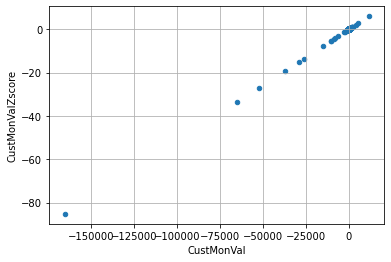

In [162]:
filtered_data.plot.scatter(x='CustMonVal', y='CustMonValZscore', grid=True)

In [164]:
## lets remove these observations

filtered_data2 = filtered_data.loc[filtered_data['CustMonVal']>-10000]

In [165]:
filtered_data2.shape

(10287, 14)

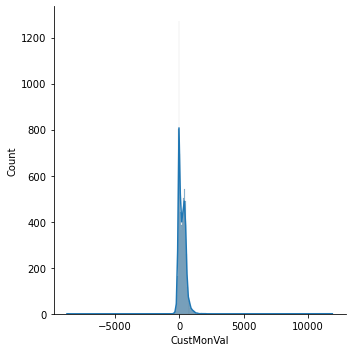

In [166]:
sns.displot(data= filtered_data2, x='CustMonVal', kde=True)

<AxesSubplot:xlabel='CustMonVal', ylabel='CustMonValZscore'>

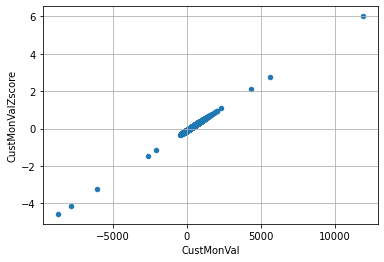

In [167]:
filtered_data2.plot.scatter(x='CustMonVal', y='CustMonValZscore', grid=True)

In [178]:
## it seems we still have outliers, lets keep only clients with LTV beteween -2k and + 2k

filtered_data2 = filtered_data.loc[(filtered_data['CustMonVal']>-2000) & (filtered_data['CustMonVal']<2000)]

In [179]:
filtered_data2.shape

(10277, 14)

In [190]:
print('we kept {:.2f} of the original data'.format((10282/10296)*100))

we kept 99.86 of the original data


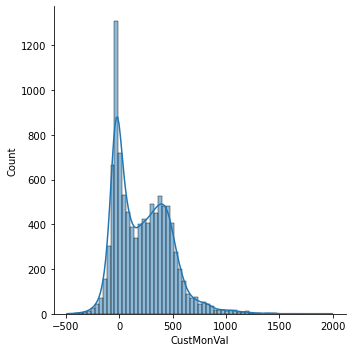

In [181]:
sns.displot(data= filtered_data2, x='CustMonVal', kde=True)

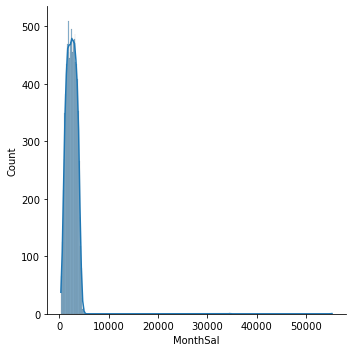

In [182]:
## plot the distribution of monthly salary
sns.displot(data= filtered_data2, x='MonthSal', kde=True)

In [184]:
filtered_data2['MothSalZscore'] = (filtered_data2['MonthSal'] - filtered_data2['MonthSal'].mean())/filtered_data2['MonthSal'].std(ddof=0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='MonthSal', ylabel='MothSalZscore'>

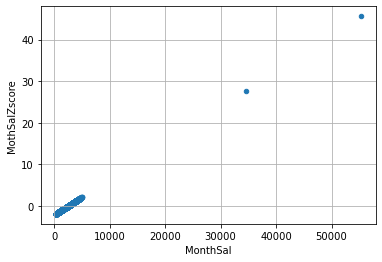

In [185]:
filtered_data2.plot.scatter(x='MonthSal', y='MothSalZscore', grid=True)

In [186]:
## lets remove these observations
filtered_data2 = filtered_data2.loc[filtered_data2['MonthSal']<30000]

In [187]:
filtered_data2.shape

(10275, 15)

In [189]:
print('we kept {:.2f} of the original data'.format((10275/10296)*100))

we kept 99.80 of the original data


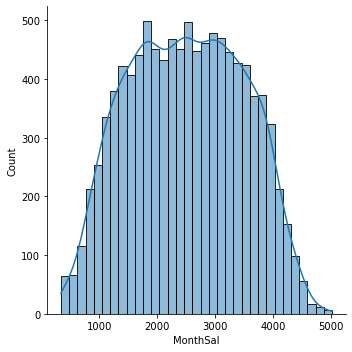

In [177]:
## plot the distribution of monthly salary
sns.displot(data= filtered_data2, x='MonthSal', kde=True)

<b> Creating new variables </b>